Import Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

sns.set_theme()

Upload dataset:

In [4]:
df = pd.read_csv("C:/Users/blue3/OneDrive/Desktop/INST414/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.shape

(253680, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
#Check for missing values
print(df.isna().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [9]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [10]:
# 0.0 = No Diabetes
# 2.0 = Diabetic
# 1.0 = Pre-diabetic
# Drop rows with 1.0 in Diabetes_012 (Pre-diabetic)
index_to_drop = df[df['Diabetes_012'] == 1.0].index
cleaned = df.drop(index_to_drop)
cleaned['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
Name: count, dtype: int64

Univariate Visualizations:

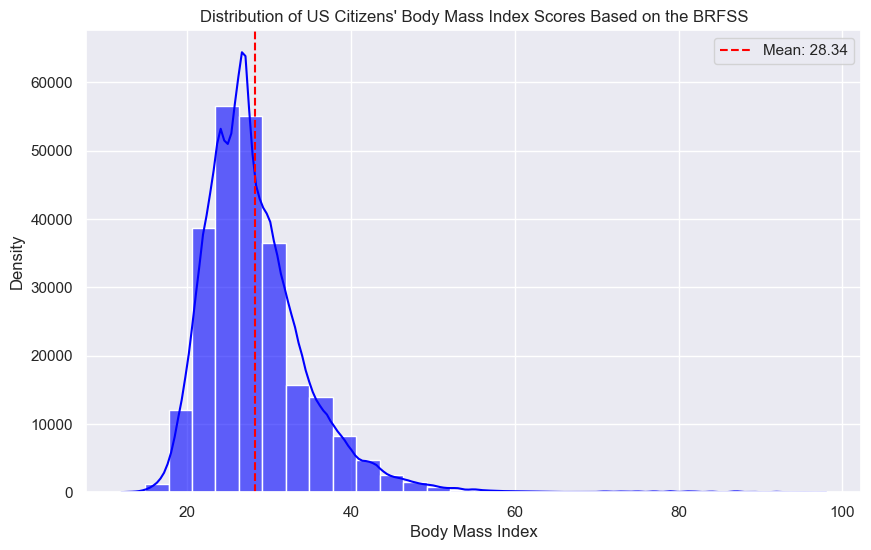

In [11]:
#Histogram measuring the distribution of Healthcare Access Percentages
fig_hist, fig_hist_ax = plt.subplots(figsize=(10, 6))


sns.histplot(
    cleaned['BMI'],
    bins=30,
    kde=True,
    color='blue',
    alpha=0.6,
    ax=fig_hist_ax
)

# Calculate mean (average) of healthcare access rates
mean_value = cleaned['BMI'].mean()

fig_hist_ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')

fig_hist_ax.set_xlabel('Body Mass Index')

fig_hist_ax.set_ylabel('Density')

fig_hist_ax.set_title("Distribution of US Citizens' Body Mass Index Scores Based on the BRFSS")

fig_hist_ax.legend()


Summary Statistics:

In [12]:
cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,249049.0,0.283848,0.697945,0.0,0.0,0.0,0.0,2.0
HighBP,249049.0,0.425282,0.494387,0.0,0.0,0.0,1.0,1.0
HighChol,249049.0,0.420463,0.493634,0.0,0.0,0.0,1.0,1.0
CholCheck,249049.0,0.962224,0.190654,0.0,1.0,1.0,1.0,1.0
BMI,249049.0,28.338813,6.594030,12.0,24.0,27.0,31.0,98.0
Smoker,249049.0,0.442246,0.496654,0.0,0.0,0.0,1.0,1.0
Stroke,249049.0,0.040261,0.196571,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,249049.0,0.093271,0.290812,0.0,0.0,0.0,0.0,1.0
PhysActivity,249049.0,0.757995,0.428298,0.0,1.0,1.0,1.0,1.0
Fruits,249049.0,0.634851,0.481473,0.0,0.0,1.0,1.0,1.0


C:\Users\blue3\AppData\Local\Temp\ipykernel_27032\475044659.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig_box_ax.legend()


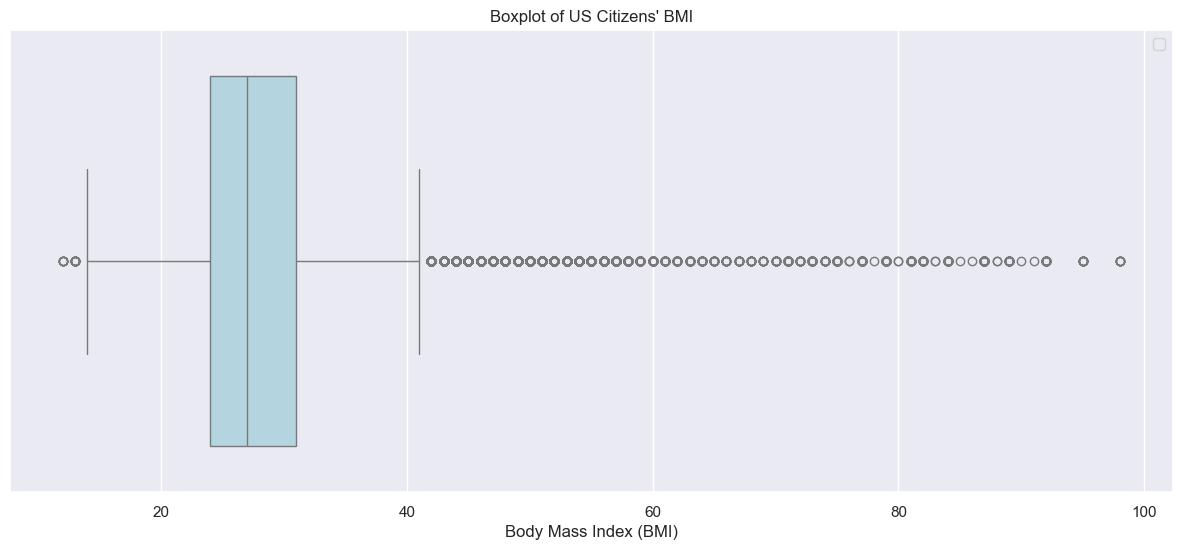

In [13]:
# Boxplot - BMI
fig_box, fig_box_ax = plt.subplots(figsize=(15, 6))

# Plot boxplot
sns.boxplot(x=cleaned['BMI'], color="lightblue", ax=fig_box_ax)

# Add labels and title
fig_box_ax.set_title("Boxplot of US Citizens' BMI")
fig_box_ax.set_xlabel("Body Mass Index (BMI)")
fig_box_ax.legend()

plt.show()

Bivariate/Multivariate Analysis:

In [14]:
#Recode values in Diabetes column
cleaned.value_counts('Diabetes_012', dropna=False)

Diabetes_012
0.0    213703
2.0     35346
Name: count, dtype: int64

In [15]:
cleaned2 = cleaned.copy()

In [16]:
# Standardize and rename values
diabetes_map = {
    0.0: "No Diabetes",
    2.0: "Diabetic"}

cleaned2["Diabetes_012"] = cleaned2["Diabetes_012"].map(diabetes_map)

cleaned2.value_counts("Diabetes_012", dropna=False)

Diabetes_012
No Diabetes    213703
Diabetic        35346
Name: count, dtype: int64

C:\Users\blue3\AppData\Local\Temp\ipykernel_27032\2732279732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Diabetes_012", y="BMI", data=cleaned2, palette="viridis", ax=fig_bar_ax)


Text(0, 0.5, 'Body Mass Index')

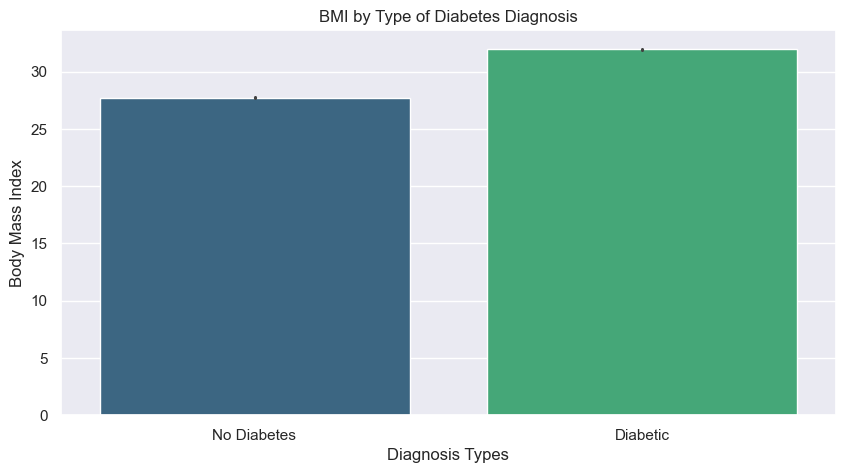

In [17]:
#Bar plot - BMI by Diabetes diagnoses
fig_bar, fig_bar_ax = plt.subplots(figsize=(10, 5))

sns.barplot(x="Diabetes_012", y="BMI", data=cleaned2, palette="viridis", ax=fig_bar_ax)

fig_bar_ax.set_title("BMI by Type of Diabetes Diagnosis")

fig_bar_ax.set_xlabel("Diagnosis Types")

fig_bar_ax.set_ylabel("Body Mass Index")

In [18]:
#Some class imbalance, certain groups like Diabetic has more records then No Diabetes.

Text(0, 0.5, 'Count')

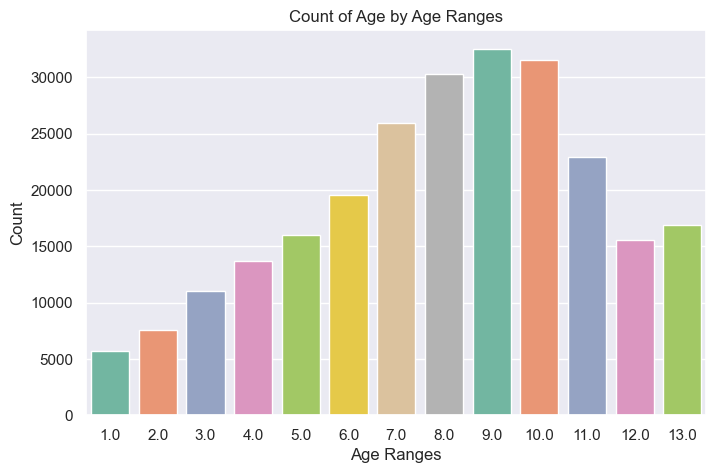

In [19]:
# Countplot for Age
fig_count, fig_count_ax = plt.subplots(figsize=(8, 5))

sns.countplot(
    x="Age",
    hue="Age",
    data=cleaned,
    palette="Set2",
    legend=False,
    ax=fig_count_ax
)

# Add a descriptive title to the chart
fig_count_ax.set_title("Count of Age by Age Ranges")

# Label the x-axis with the name of the categorical variable
fig_count_ax.set_xlabel("Age Ranges")

# Label the y-axis with what is being measured (number of countries in each group)
fig_count_ax.set_ylabel("Count")

In [20]:
#Key for Count Plot
#1 = Age 18 to 24 
#2 = Age 25 to 29 
#3 = Age 30 to 34
#4 = Age 35 to 39 
#5 = Age 40 to 44
#6 = Age 45 to 49 
#7 = Age 50 to 54
#8 = Age 55 to 59
#9 = Age 60 to 64
#10 = Age 65 to 69
#11 = Age 70 to 74 
#12 = Age 75 to 79
#13 = Age 80 or older

In [21]:
#correlations (include all variables)
corr_cleaned = cleaned[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
                        'Smoker', 'Stroke', 'HeartDiseaseorAttack',	'PhysActivity', 'Fruits',
                        'AnyHealthcare', 'NoDocbcCost',	'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
                        'Sex', 'Age', 'Education', 'Income']].corr()

print(corr_cleaned)

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.269319  0.205684   0.066037  0.222353   
HighBP                    0.269319  1.000000  0.297901   0.098365  0.213489   
HighChol                  0.205684  0.297901  1.000000   0.085530  0.106792   
CholCheck                 0.066037  0.098365  0.085530   1.000000  0.034090   
BMI                       0.222353  0.213489  0.106792   0.034090  1.000000   
Smoker                    0.062212  0.097235  0.090680  -0.010065  0.013554   
Stroke                    0.107990  0.130302  0.092650   0.024618  0.020804   
HeartDiseaseorAttack      0.181258  0.210217  0.181250   0.044574  0.053592   
PhysActivity             -0.121028 -0.125304 -0.077966   0.004584 -0.146581   
Fruits                   -0.041736 -0.040398 -0.040581   0.023957 -0.087227   
AnyHealthcare             0.016241  0.038501  0.043103   0.117995 -0.017712   
NoDocbcCost               0.033152  0.017169  0.0122

Text(0.5, 1.0, 'Correlation Heatmap of Diabetes/Health Indicators')

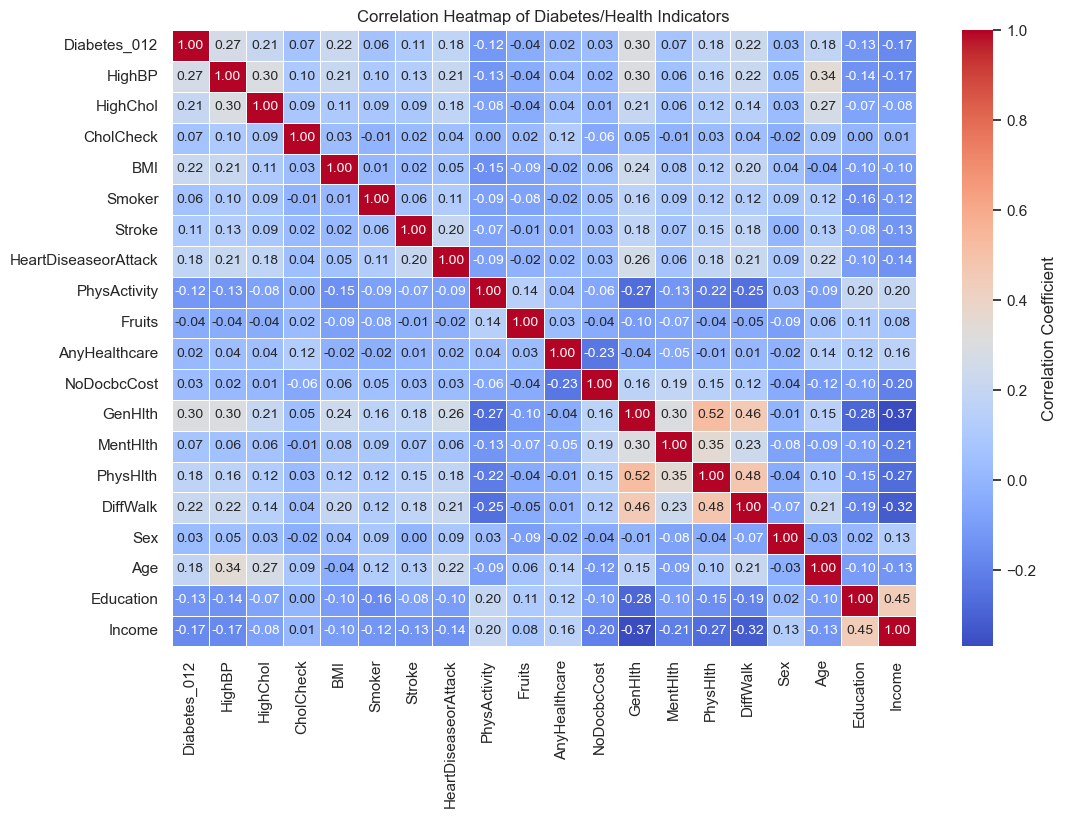

In [22]:
#Heatmap of correlations
fig_heatmap, fig_heatmap_ax = plt.subplots(figsize=(12, 8))

sns.heatmap(
    corr_cleaned,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={'size': 10},
    cbar_kws={'label': 'Correlation Coefficient'},
    ax=fig_heatmap_ax)

fig_heatmap_ax.set_title('Correlation Heatmap of Diabetes/Health Indicators')

Export Cleaned Dataset

In [23]:
cleaned.to_csv("diabetes_health_data.csv", index=False)